# Cross Fold Validation Neural Network
By Brandon Khuu
Last updated: 5/4/2021

### Goal
The goal of this model is to create a neural network that would be able to classify whether a patient did or did not have Autism based on mRNA data(FPKM reads).  

The data was from Elaine Lim Lab.

In [1]:
#import libraries 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data

Data that is import was cleaned and preprocess in the data_preprocessing.py<br>
The data was raw fpkm mRNA reads that were cleaned by applying a threshold and outliers were removed.

The threshold applied was if the FPKM read has a mean of at least 2. Any read that was below 2 was filterd out.

After a threshold was applied, outliers were removed by creating a mathmatical filter.  Any reads that were above the function IQR*1.5 were assumed to be an outlier and removed.

In [2]:
#import data
df = pd.read_csv(df = pd.read_csv('Organoid Files/all_autism_fpkm_iqr_1.5_outliers.csv', header=0, index_col=0))
df.head()

,Autism,CDK5RAP1,TMEM246,PKD1,EDEM1,LSM11,COL26A1,CPSF6,DCTN5,TIMM9,...,NHLRC3,CCDC130,PIK3C3,PRKAB2,EIF2B3,C15orf61,IPP,ASB3,EHD4,NRSN2
PGP1-1,0.0,5.561823,9.167399,4.762467,4.259699,3.333153,5.245319,15.288924,10.670947,12.501312,...,3.577807,10.246243,9.379072,7.974797,6.506580,1.808342,2.624415,5.473228,9.892221,14.017985
PGP1-2,0.0,2.050032,6.121957,3.086031,3.888580,3.064389,4.530108,14.225061,11.109630,14.227982,...,2.951153,8.455335,13.197261,7.847511,6.687741,1.614225,3.276070,7.483068,7.377414,11.613564
PGP1-3,0.0,2.481599,14.205795,8.663784,2.988719,13.747564,6.189141,18.021990,15.850792,9.134396,...,3.211442,9.928194,7.313368,9.023667,6.744241,3.626686,2.221963,5.087976,2.392554,15.666102
GM23716-1,0.0,4.396121,15.263531,8.198981,3.433083,13.873706,5.018456,17.714552,15.832140,8.492397,...,3.052629,9.895930,7.927309,9.817574,6.570986,3.988325,2.459700,4.626596,2.301205,16.500382
GM23716-2,0.0,3.721746,14.125613,10.278191,3.331196,13.211928,5.620373,15.806883,15.434513,8.410669,...,2.743381,9.354041,8.525394,8.338526,5.990253,3.849378,2.494851,4.843815,2.285043,18.534124


## Split data

Data is split by target(y) and features(x)

In [3]:
#split x and y base
y = df.Autism
x = df.iloc[:,1:]

## Create Model

Import keras from tensor flow to create a neural network model to be trained.<br>
Model<br>
   -1 input layer<br>
   -1 batch normalization<br>
   -1 dropout at .2<br>
   -output layer<br>
Compiled <br>
    -optimizer: RMSprop algorithm which maintains a moving discounted average of the square of the gradients and divides the graident by the root of the average.<br>
    -loss function: binary cross entropty<br>
    -metric: accuracy<br>

In [4]:
from tensorflow import keras
from tensorflow.keras import layers

#create early stop
early_stop = keras.callbacks.EarlyStopping(monitor='loss',patience=2, verbose=1)

#create model
model = keras.Sequential([
    layers.Dense(units=100, activation='relu',input_shape=[8163]),
    #layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(units=1,activation='sigmoid')
])

#compile model with functions
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


### Train Model

Fit the model with the training data using cross fold validation(kfold). <br>
Split data into train and test data using KFold function .split<br>

Epoch 1/100
3/3 [==============================] - 1s 104ms/step - loss: 13.4572 - accuracy: 0.6286 - val_loss: 15.4796 - val_accuracy: 0.6000
Epoch 2/100
3/3 [==============================] - 0s 15ms/step - loss: 12.0093 - accuracy: 0.5718 - val_loss: 26.3784 - val_accuracy: 0.4000
Epoch 3/100
3/3 [==============================] - 0s 15ms/step - loss: 15.6212 - accuracy: 0.5975 - val_loss: 13.4240 - val_accuracy: 0.6000
Epoch 4/100
3/3 [==============================] - 0s 15ms/step - loss: 18.7892 - accuracy: 0.5339 - val_loss: 0.9255 - val_accuracy: 0.8000
Epoch 00004: early stopping


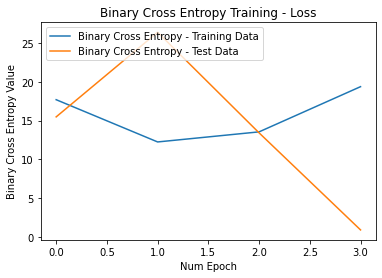

Epoch 1/100
3/3 [==============================] - 0s 34ms/step - loss: 8.1441 - accuracy: 0.5614 - val_loss: 4.3400 - val_accuracy: 0.6429
Epoch 2/100
3/3 [==============================] - 0s 15ms/step - loss: 6.9351 - accuracy: 0.6842 - val_loss: 5.9662 - val_accuracy: 0.5000
Epoch 3/100
3/3 [==============================] - 0s 14ms/step - loss: 7.1953 - accuracy: 0.5614 - val_loss: 4.2010 - val_accuracy: 0.5000
Epoch 4/100
3/3 [==============================] - 0s 13ms/step - loss: 3.3537 - accuracy: 0.6842 - val_loss: 2.4167 - val_accuracy: 0.6429
Epoch 5/100
3/3 [==============================] - 0s 15ms/step - loss: 8.6507 - accuracy: 0.5088 - val_loss: 0.0927 - val_accuracy: 0.9286
Epoch 6/100
3/3 [==============================] - 0s 13ms/step - loss: 3.3558 - accuracy: 0.7018 - val_loss: 2.8701 - val_accuracy: 0.5714
Epoch 00006: early stopping


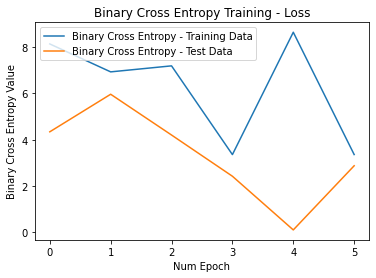

Epoch 1/100
3/3 [==============================] - 0s 39ms/step - loss: 2.6662 - accuracy: 0.6316 - val_loss: 1.1052 - val_accuracy: 0.5714
Epoch 2/100
3/3 [==============================] - 0s 18ms/step - loss: 1.5122 - accuracy: 0.7895 - val_loss: 3.4665 - val_accuracy: 0.5714
Epoch 3/100
3/3 [==============================] - 0s 15ms/step - loss: 2.0888 - accuracy: 0.6667 - val_loss: 0.5135 - val_accuracy: 0.8571
Epoch 4/100
3/3 [==============================] - 0s 11ms/step - loss: 1.3066 - accuracy: 0.7193 - val_loss: 1.7255 - val_accuracy: 0.7143
Epoch 5/100
3/3 [==============================] - 0s 17ms/step - loss: 1.5956 - accuracy: 0.7018 - val_loss: 0.4515 - val_accuracy: 0.7143
Epoch 6/100
3/3 [==============================] - 0s 16ms/step - loss: 0.5305 - accuracy: 0.7544 - val_loss: 0.6015 - val_accuracy: 0.6429
Epoch 7/100
3/3 [==============================] - 0s 12ms/step - loss: 0.5709 - accuracy: 0.7193 - val_loss: 0.4139 - val_accuracy: 0.8571
Epoch 8/100
3/3 [===

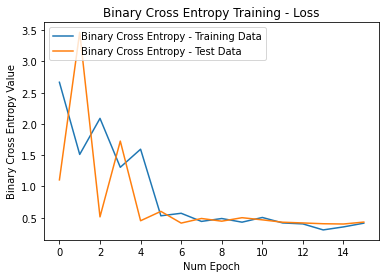

Epoch 1/100
3/3 [==============================] - 0s 39ms/step - loss: 0.3927 - accuracy: 0.8070 - val_loss: 0.3061 - val_accuracy: 0.9286
Epoch 2/100
3/3 [==============================] - 0s 15ms/step - loss: 0.3879 - accuracy: 0.8070 - val_loss: 0.3310 - val_accuracy: 1.0000
Epoch 3/100
3/3 [==============================] - 0s 14ms/step - loss: 0.4201 - accuracy: 0.6842 - val_loss: 0.3689 - val_accuracy: 0.9286
Epoch 4/100
3/3 [==============================] - 0s 16ms/step - loss: 0.3562 - accuracy: 0.8070 - val_loss: 0.3025 - val_accuracy: 1.0000
Epoch 5/100
3/3 [==============================] - 0s 15ms/step - loss: 0.3526 - accuracy: 0.7719 - val_loss: 0.3145 - val_accuracy: 0.8571
Epoch 6/100
3/3 [==============================] - 0s 14ms/step - loss: 0.4483 - accuracy: 0.6842 - val_loss: 0.3058 - val_accuracy: 0.8571
Epoch 7/100
3/3 [==============================] - 0s 15ms/step - loss: 0.3305 - accuracy: 0.8947 - val_loss: 0.4472 - val_accuracy: 0.7857
Epoch 8/100
3/3 [===

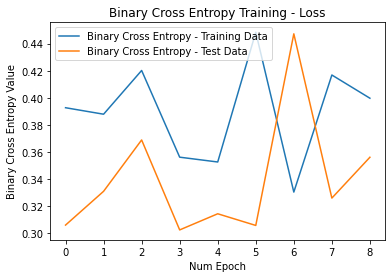

Epoch 1/100
3/3 [==============================] - 0s 34ms/step - loss: 0.3509 - accuracy: 0.8421 - val_loss: 0.3359 - val_accuracy: 0.9286
Epoch 2/100
3/3 [==============================] - 0s 11ms/step - loss: 0.4026 - accuracy: 0.8070 - val_loss: 0.3251 - val_accuracy: 0.9286
Epoch 3/100
3/3 [==============================] - 0s 14ms/step - loss: 0.3808 - accuracy: 0.8947 - val_loss: 0.2522 - val_accuracy: 1.0000
Epoch 00003: early stopping


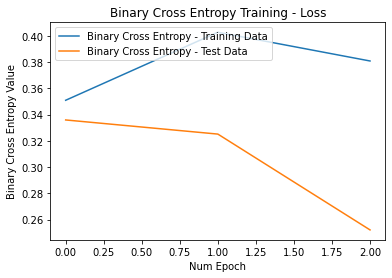

In [5]:
#import cross fold validation
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

k = 5 #number of folds

#initialize kfold
kf = KFold(n_splits=k, random_state=0, shuffle=True)

#create empty list to hold scores
acc_score = []

#split training data
for train_index,test_index in kf.split(x):
    x_train, x_test = x.iloc[train_index,:], x.iloc[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    
    #fit model with training data
    history = model.fit(x_train, y_train, validation_data=(x_test,y_test),
                        batch_size = 25, epochs=100, shuffle=True, callbacks=[early_stop])
    pred = model.predict(x_test)
    
    #record accuracy of each fold
    acc = accuracy_score(pred.round(), y_test)
    acc_score.append(acc)
    
    plt.plot(history.history['loss'], label='Binary Cross Entropy - Training Data')
    plt.plot(history.history['val_loss'], label='Binary Cross Entropy - Test Data')
    plt.title('Binary Cross Entropy Training - Loss')
    plt.ylabel('Binary Cross Entropy Value')
    plt.xlabel('Num Epoch')
    plt.legend(loc='upper left')
    plt.show()

In [6]:
#Print accuracy of the model
avg_score = sum(acc_score)/k
print('Accuracy of each fold = {}'.format(acc_score))
print('Avg accuracy = {}'.format(avg_score))

Accuracy of each fold = [0.8, 0.5714285714285714, 0.8571428571428571, 0.8571428571428571, 1.0]
Avg accuracy = 0.8171428571428571


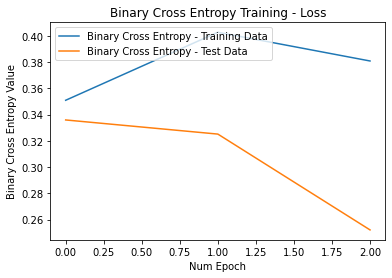

In [7]:
plt.plot(history.history['loss'], label='Binary Cross Entropy - Training Data')
plt.plot(history.history['val_loss'], label='Binary Cross Entropy - Test Data')
plt.title('Binary Cross Entropy Training - Loss')
plt.ylabel('Binary Cross Entropy Value')
plt.xlabel('Num Epoch')
plt.legend(loc='upper left')
plt.show()

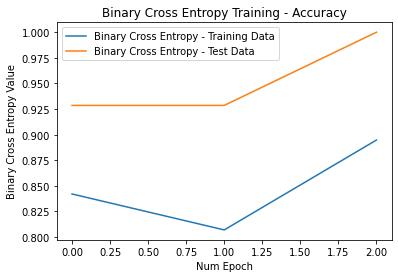

In [8]:
plt.plot(history.history['accuracy'], label='Binary Cross Entropy - Training Data')
plt.plot(history.history['val_accuracy'], label='Binary Cross Entropy - Test Data')
plt.title('Binary Cross Entropy Training - Accuracy')
plt.ylabel('Binary Cross Entropy Value')
plt.xlabel('Num Epoch')
plt.legend(loc='upper left')
plt.show()